In [1]:
%run __init__.py
%matplotlib inline

Using TensorFlow backend.


In [2]:
mndata = MNIST('./python-mnist/data')
X_train,y_train=mndata.load_training()
X_test, y_test=mndata.load_testing()
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test= np.array(X_test)
y_test=np.array(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [3]:
image = np.array(X_train[0]).reshape((28,28))

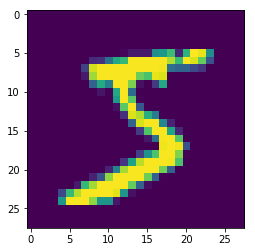

In [5]:
plt.imshow(image)
plt.show()

### Preprocessing

In [6]:
SS=StandardScaler()

In [7]:
X_train_ss= SS.fit_transform(X_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


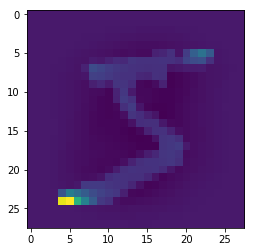

In [8]:
image = np.array(X_train_ss[0]).reshape((28,28))
plt.imshow(image)
plt.show()

values 0 to 1

In [9]:
X_train_01=X_train/255

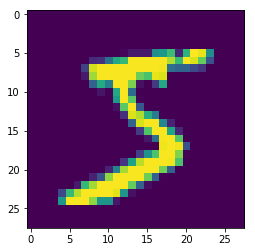

In [10]:
image = np.array(X_train_01[0]).reshape((28,28))
plt.imshow(image)
plt.show()

deskew

In [5]:
from scipy.ndimage import interpolation

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix

In [6]:
def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)

In [7]:
def deskewAll(X):
    currents = []
    for i in range(len(X)):
        currents.append(deskew(X[i].reshape(28,28)).flatten())
    return np.array(currents)

X_train_deskewed = deskewAll(X_train)
X_test_deskewed = deskewAll(X_test)

In [35]:
image = X_train[5].reshape((28,28))

In [36]:
image_deskewed = X_train_deskewed[5].reshape((28,28))

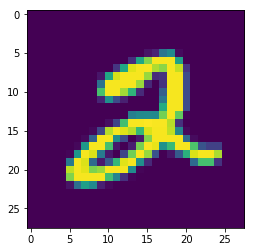

In [37]:
plt.imshow(image)
plt.show()

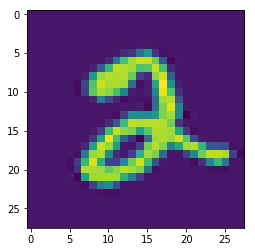

In [38]:
plt.imshow(image_deskewed)
plt.show()

### PCA

In [37]:
X_train_deskewed.shape, y_train.shape

((60000, 784), (60000,))

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


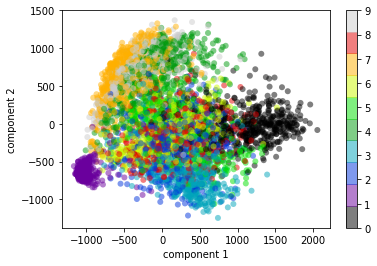

In [38]:
from sklearn.decomposition import PCA
pca = PCA(2)
PCA_fit = pca.fit(X_train_deskewed[:5000])
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_train[:5000], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
plt.show()

In [39]:
sum(PCA_fit.explained_variance_ratio_)

0.23592628153366285

In [42]:
pca = PCA(10)

In [43]:
PCA_fit = pca.fit(X_train_deskewed)

In [44]:
PCA_fit.explained_variance_ratio_

array([ 0.13684364,  0.09386178,  0.07132795,  0.06262913,  0.04932085,
        0.04304247,  0.03608701,  0.02664736,  0.02609377,  0.02358549])

In [45]:
sum(PCA_fit.explained_variance_ratio_)

0.5694394327860135

In [46]:
pca=PCA(40)
PCA_fit = pca.fit(X_train_deskewed)
sum(PCA_fit.explained_variance_ratio_)

0.83199224537490002

In [47]:
pca=PCA(100)
PCA_fit = pca.fit(X_train_deskewed)
sum(PCA_fit.explained_variance_ratio_)

0.93960143575652477

In [48]:
pca=PCA(200)
PCA_fit = pca.fit(X_train_deskewed)
sum(PCA_fit.explained_variance_ratio_)

0.97997508801455657

In [49]:
pca=PCA(300)
PCA_fit = pca.fit(X_train_deskewed)
sum(PCA_fit.explained_variance_ratio_)

0.99302438351508682

In [50]:
pca=PCA(400)
PCA_fit = pca.fit(X_train_deskewed)
sum(PCA_fit.explained_variance_ratio_)

0.99844726612436752

In [59]:
#The amount of variance that each PC explains
pca=PCA(784)
PCA_fit=pca.fit(X_train_deskewed)
var= PCA_fit.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print (var1)

[ 13.68  23.07  30.2   36.46  41.39  45.69  49.3   51.96  54.57  56.93
  58.85  60.74  62.45  64.07  65.53  66.82  68.08  69.25  70.32  71.27
  72.12  72.94  73.74  74.53  75.28  75.99  76.66  77.31  77.93  78.51
  79.09  79.62  80.13  80.63  81.1   81.56  82.    82.43  82.83  83.21
  83.59  83.96  84.31  84.65  84.97  85.28  85.58  85.87  86.15  86.43
  86.7   86.97  87.23  87.48  87.72  87.96  88.18  88.4   88.61  88.82
  89.02  89.22  89.42  89.6   89.78  89.95  90.12  90.29  90.45  90.61
  90.77  90.92  91.07  91.21  91.35  91.48  91.61  91.74  91.87  91.99
  92.11  92.23  92.35  92.47  92.58  92.69  92.8   92.9   93.    93.1   93.2
  93.3   93.39  93.48  93.57  93.66  93.75  93.84  93.92  94.    94.08
  94.16  94.24  94.32  94.39  94.46  94.53  94.6   94.67  94.74  94.81
  94.88  94.95  95.01  95.07  95.13  95.19  95.25  95.31  95.37  95.43
  95.48  95.53  95.58  95.63  95.68  95.73  95.78  95.83  95.88  95.93
  95.98  96.03  96.08  96.12  96.16  96.2   96.24  96.28  96.32  96.36


In [68]:
np.where(var1>=99.86)

(array([354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
        367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379,
        380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392,
        393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405,
        406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
        419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431,
        432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444,
        445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457,
        458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470,
        471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483,
        484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496,
        497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509,
        510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522,
        523, 524, 525, 526, 527, 528, 529, 530, 531

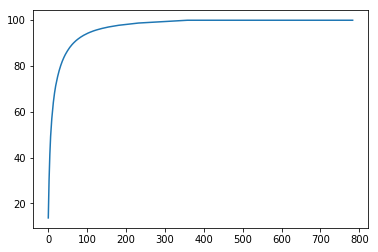

In [60]:
plt.plot(var1)

the max of variance explained is with 354 components and is 99.86%

In [8]:
from sklearn.decomposition import PCA
pca=PCA(40)
PCA_fit_transform = pca.fit_transform(X_train_deskewed)

In [9]:
PCA_fit_transform.shape

(60000, 40)

### Logistic regression on 40 PCA

In [10]:
PCA_test= pca.transform(X_test_deskewed)

In [11]:
PCA_test.shape

(10000, 40)

In [12]:
LR=LogisticRegression()
LR.fit(PCA_fit_transform, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
LR.score(PCA_test, y_test)

0.94499999999999995

In [14]:
X_train1 = PCA_fit_transform.astype('float32')
X_test1 = PCA_test.astype('float32')
X_train1 /= 255 # scaling
X_test1 /= 255
X_train1 = X_train1.reshape(X_train1.shape[0], X_train1.shape[1], 1)# 1 becuase we have 1 channel- because black and white
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1)
y_train1 = keras.utils.to_categorical(y_train, 10)
y_test1 = keras.utils.to_categorical(y_test, 10)

In [15]:
LR = Sequential([
    Flatten(input_shape=(40,1), name= "flatten_1_mlp"),
    Dense(10, activation='softmax')
])

In [16]:
LR.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1_mlp (Flatten)      (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                410       
Total params: 410
Trainable params: 410
Non-trainable params: 0
_________________________________________________________________


In [17]:
LR.compile(optimizer=keras.optimizers.SGD(), 
           loss=keras.losses.categorical_crossentropy,
           metrics=['accuracy'])

In [20]:
LR_history=LR.fit(X_train1, y_train1, validation_split=.2, epochs=100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 38us/step - loss: 0.7706 - acc: 0.7847 - val_loss: 0.3740 - val_acc: 0.9085
Epoch 2/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.3459 - acc: 0.9102 - val_loss: 0.2934 - val_acc: 0.9252
Epoch 3/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.2930 - acc: 0.9207 - val_loss: 0.2632 - val_acc: 0.9294
Epoch 4/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.2682 - acc: 0.9260 - val_loss: 0.2467 - val_acc: 0.9329
Epoch 5/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.2531 - acc: 0.9296 - val_loss: 0.2360 - val_acc: 0.9353
Epoch 6/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.2429 - acc: 0.9317 - val_loss: 0.2284 - val_acc: 0.9386
Epoch 7/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.2353 - acc: 0.9336 - val_loss: 0.2227 - 

48000/48000 [==============================] - 2s 33us/step - loss: 0.1889 - acc: 0.9448 - val_loss: 0.1893 - val_acc: 0.9460
Epoch 60/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.1887 - acc: 0.9447 - val_loss: 0.1892 - val_acc: 0.9462
Epoch 61/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.1886 - acc: 0.9447 - val_loss: 0.1893 - val_acc: 0.9460
Epoch 62/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.1885 - acc: 0.9447 - val_loss: 0.1891 - val_acc: 0.9461
Epoch 63/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.1884 - acc: 0.9449 - val_loss: 0.1890 - val_acc: 0.9459
Epoch 64/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.1883 - acc: 0.9449 - val_loss: 0.1891 - val_acc: 0.9462
Epoch 65/100
48000/48000 [==============================] - 2s 32us/step - loss: 0.1882 - acc: 0.9448 - val_loss: 0.1891 - val_acc: 0.9462
Epoch 66/100
48000/48000 [==============

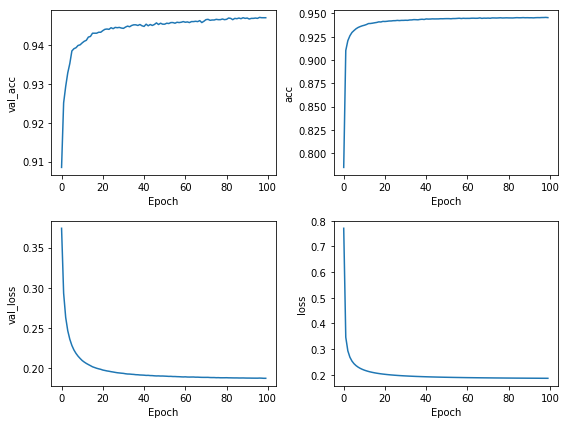

In [21]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(LR_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()

In [26]:
score = LR.evaluate(X_test1, y_test1)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(LR.predict_classes(X_test1[1:5]))
print(y_test1[1:5])

10000/10000 [==============================] - 0s 17us/step
Test score: 0.17472328835
Test accuracy: 0.9488
[2 1 0 4]
[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
y_pred = LR.predict_classes(X_test1)
print(y_pred)
print(y_test)
#p=model.predict_proba(X_test) # to predict probability

print(classification_report(y_test, y_pred))
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       980
          1       0.98      0.98      0.98      1135
          2       0.94      0.92      0.93      1032
          3       0.95      0.95      0.95      1010
          4       0.94      0.95      0.95       982
          5       0.93      0.95      0.94       892
          6       0.96      0.94      0.95       958
          7       0.95      0.95      0.95      1028
          8       0.92      0.94      0.93       974
          9       0.94      0.92      0.93      1009

avg / total       0.95      0.95      0.95     10000

[[ 961    0    2    0    0    9    2    2    3    1]
 [   0 1113    5    3    0    1    4    1    8    0]
 [   7    5  954   13   10    3    4    8   27    1]
 [   3    2    9  959    0   15    0    5   12    5]
 [   1    0    4    2  932    3    9    4    6   21]
 [   6    0    1    8    5  849   10    1    9    3]
 [  1

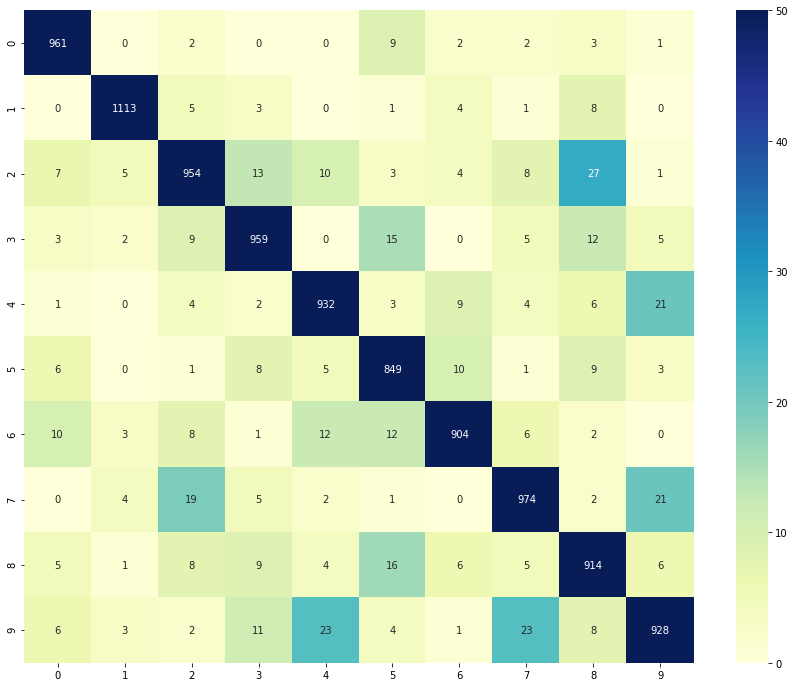

In [33]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (15,12))
sn.heatmap(df_cm, annot=True, fmt="g", cmap="YlGnBu", vmax=50)